In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from keras import models
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
BATCH_SIZE = 30 
IMAGE_HEIGHT = 224
IMAGE_WIDTH=224
CHANNELS=3
EPOCHS=8  

In [3]:
# importing training Dataset

TrainDataset = tf.keras.preprocessing.image_dataset_from_directory(
    "E:\\leaf disease\\split dataset\\train",
    shuffle=True,
    image_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    batch_size=BATCH_SIZE
)

Found 18780 files belonging to 17 classes.


In [4]:
ValidationDataset= tf.keras.preprocessing.image_dataset_from_directory(
    "E:\\leaf disease\\split dataset\\val",
    shuffle=False,
    image_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    batch_size=BATCH_SIZE
)

Found 2343 files belonging to 17 classes.


In [5]:
classes= TrainDataset.class_names


In [8]:
Resize_Rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_HEIGHT,IMAGE_WIDTH),
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [9]:
InputShape = (IMAGE_HEIGHT,IMAGE_WIDTH, CHANNELS)

efficientnet_v2_model = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

efficientnet_v2_model_without_top_layer = hub.KerasLayer(
    efficientnet_v2_model, 
    input_shape=InputShape, 
    trainable=False)

In [10]:
OutputClasses=len(classes)

In [11]:
Model = tf.keras.Sequential([
    Resize_Rescale,
    efficientnet_v2_model_without_top_layer,
    tf.keras.layers.Dense(OutputClasses, activation='softmax')
])
Model.build([None, IMAGE_HEIGHT,IMAGE_WIDTH,CHANNELS]) 
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              5919312   
                                                                 
 dense (Dense)               (None, 17)                21777     
                                                                 
Total params: 5,941,089
Trainable params: 21,777
Non-trainable params: 5,919,312
_________________________________________________________________


In [12]:
Model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [13]:
TrainingHistory = Model.fit(
    TrainDataset,
    batch_size=BATCH_SIZE,
    validation_data=ValidationDataset,
    verbose=1,
    epochs=EPOCHS, 
)

Epoch 1/8
626/626 [==============================] - 830s 1s/step - loss: 0.8944 - accuracy: 0.7593 - val_loss: 0.5457 - val_accuracy: 0.8399
Epoch 2/8
626/626 [==============================] - 690s 1s/step - loss: 0.4378 - accuracy: 0.8811 - val_loss: 0.4074 - val_accuracy: 0.8749
Epoch 3/8
626/626 [==============================] - 697s 1s/step - loss: 0.3326 - accuracy: 0.9089 - val_loss: 0.3435 - val_accuracy: 0.8899
Epoch 4/8
626/626 [==============================] - 698s 1s/step - loss: 0.2808 - accuracy: 0.9219 - val_loss: 0.3106 - val_accuracy: 0.9014
Epoch 5/8
626/626 [==============================] - 696s 1s/step - loss: 0.2443 - accuracy: 0.9313 - val_loss: 0.2810 - val_accuracy: 0.9104
Epoch 6/8
626/626 [==============================] - 695s 1s/step - loss: 0.2218 - accuracy: 0.9372 - val_loss: 0.2692 - val_accuracy: 0.9129
Epoch 7/8
626/626 [==============================] - 692s 1s/step - loss: 0.2026 - accuracy: 0.9417 - val_loss: 0.2453 - val_accuracy: 0.9172
Epoch 

In [14]:
Model.save("E:\\leaf disease\\LFR EFFICIENTNET.h5")

In [15]:
TrainingHistory

In [16]:
TrainingHistory.params

{'verbose': 1, 'epochs': 8, 'steps': 626}

In [17]:
TrainingHistory.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
TrainingAccuracy = TrainingHistory.history['accuracy']
ValidationAccuracy = TrainingHistory.history['val_accuracy']
TrainignLoss = TrainingHistory.history['loss']
ValidationLoss = TrainingHistory.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

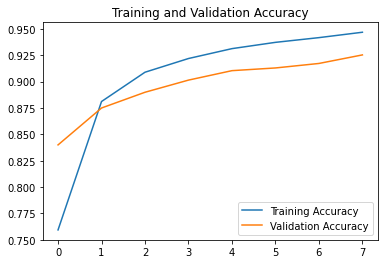

In [19]:
plt.plot(range(EPOCHS), TrainingAccuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), ValidationAccuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


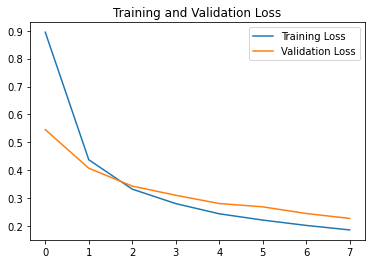

In [20]:
plt.plot(range(EPOCHS), TrainignLoss, label='Training Loss')
plt.plot(range(EPOCHS), ValidationLoss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()